# Juego serpientes y escaleras

Se hará una simulación del juego de serpientes y escaleras para saber en cuantos lanzamientos de dado en promedio se termina el juego tomando en cuanta que solo se arroja un solo dado y solo sera un solo jugador.



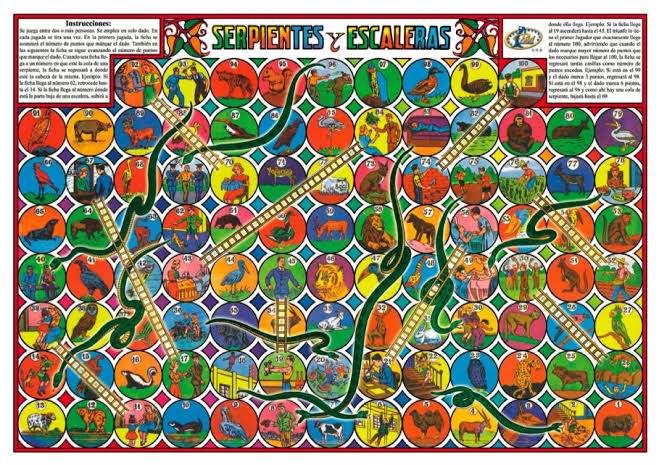

In [6]:
from random import random
from math import floor
import numpy as np

dado = lambda :floor((6-1+1)*random())+1

def SyE():
	P1 = 0 # posicion del jugador
	partida = [] # registro de la posicion del jugador
	# Serpientes y escaleras
	accion = {
		11:39, # E
		17:67, # E
		18:6, # S
		19:45, # E
		21:56, # E
		22:2, # S
		26:50, # E
		36:20, # S
		43:84, # E
		52:76, # E
		62:14, # S
		70:92, # E
		74:100, # E
		75:30, # S
		78:49, # S
		83:8, # S
		93:40, # S
		96:69 # S
  }
	while P1<100:
		P1 += dado()
		if P1 in accion:
			P1 = accion[P1]
			partida.append(P1)
		else:
			partida.append(P1)
	return partida

partida1 = SyE()
print(partida1)
print(len(partida1))

# Montecarlo
print("promedio de lanzamientos para terminar el juego:", np.array( [ len(SyE()) for i in range(20000)] ).mean() )

[6, 9, 13, 45, 46, 48, 76, 82, 87, 40, 44, 46, 48, 49, 76, 80, 8, 14, 16, 45, 49, 54, 59, 65, 67, 92, 94, 95, 101]
29
promedio de lanzamientos para terminar el juego: 27.30115


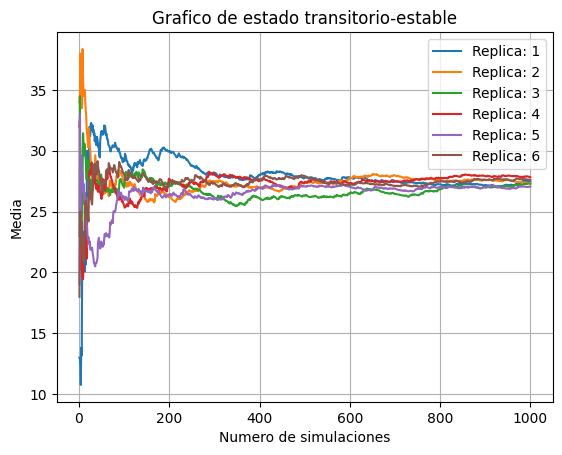

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def datos(n):
	k = []
	lista = []
	medias = []
	for i in range(n):
		k.append(i+1) # indices
		lista.append(len(SyE())) # total de lanzamientos
		medias.append(np.array(lista).mean()) # medias
	return pd.DataFrame(np.array([k,lista,medias]).T,columns=["n","total","media"])

tabla = datos(1000)

for i in range(6):
	tabla = datos(1000)
	plt.plot(tabla["n"],tabla["media"],label="Replica: {0}".format(i+1))

plt.title("Grafico de estado transitorio-estable")
plt.legend(loc="upper right")
plt.ylabel("Media")
plt.xlabel("Numero de simulaciones")
plt.grid()
plt.show()